#<b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
Malaria is a vector borne disease that kills almost half a million people every year; two-thirds of which were children under the age of 5. Currently 50% of the worlds population is in danger from malaria, this number is expected to grow as climate change further expands the habitable area of mosquitos.  

Malaria is contracted when an infected Anopheles mosquito bites a human and passes Plasmodum parasites into the victims bloodstream. Once in the blood, the parasites damage red blood cells (RBC) which can lead to respiratory distress, fever, chills, headaches, fatigue, and other complications. Malaria can rapidly become severe. Fortunately, while malaria can be deadily, if it is detected early, it is easy to treat.

Malaria is detected by analyzing blood cells under a microscope to look for infected cells. Unfortunately, it requires highly trained professionals to identify infected cells under a microscope, and thus, detection can be difficult - especially in underserved areas that might not have access to skilled professionals. One potential solution to improve malaria detection is to use machine learning and artificial intelligence to identify infected cells.

**The objectives:** What is the intended goal?<br>
The key objective of this project is to determine if we can build a malaria detection tool that can accurately determine if a RBC is infected. We want to classify images of red blood cells into parasitized or uninfected 

**The key questions:** What are the key questions that need to be answered?<br>
The question we want to answer is whether or not the patient is infected with Malaria.

**The problem formulation:** What is it that we are trying to solve using data science?
We are trying to use data science to determine if an observed cell is infected with Plasmodum parasites. We should use image recongition techniques to determine if the cell is infected.


## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [2]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (64,64)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [8]:
# shape of images
print("Shape of train images:", train_images.shape)
print("Shape of test images:", test_images.shape)

Shape of train images: (24958, 64, 64, 3)
Shape of test images: (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [9]:
# shape of labels 
print("Shape of train labels:", train_labels.shape)
print("Shape of test lables:", test_labels.shape)

Shape of train labels: (24958,)
Shape of test lables: (2600,)


#####<b> Observations and insights:
We see that we have the same number of labels as images for both the training data (24,958) and testing data (2,600). 

We see the images have been successfully converted to a 4D array which was the goal of the steps prior. 

### <b>Check the minimum and maximum range of pixel values for train and test images

In [10]:
# try to use min and max function from numpy
print("Min max range for train images:", train_images.min(), "-", train_images.max())
print("Min max range for test images:", test_images.min(), "-", test_images.max())

Min max range for train images: 0 - 255
Min max range for test images: 0 - 255


#####<b> Observations and insights:
Both the training and test data have the same pixel ranges.


###<b> Count the number of values in both uninfected and parasitized 

In [11]:
# try to use value_counts to count the values - value_counts is for pandas dataframes.. here we have a numpy array therefore this is not a valid option. We can either 1. use a different function to count, or convert the data types to a pandas dataframe
# given that I am less comfortable with data types, and don't want to run into similar data typing issues later on, I will use the appropriate numpy functions to find an answer

count_train_labels = np.bincount(train_labels)
count_test_labels = np.bincount(test_labels)

# Return values
print("Number of parasitized images in training set:", count_train_labels[1])
print("Number of uninfected images in training set:", count_train_labels[0])
print("Number of parasitized images in test set:", count_test_labels[1])
print("Number of uninfected images in test set:", count_test_labels[0])


Number of parasitized images in training set: 12582
Number of uninfected images in training set: 12376
Number of parasitized images in test set: 1300
Number of uninfected images in test set: 1300


###<b>Normalize the images

In [12]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

#####<b> Observations and insights:
We find that almost half our training data is infected, and half isn't. For our test data the split is 50-50. This means we have equal representation in each group.



###<b> Plot to check if the data is balanced

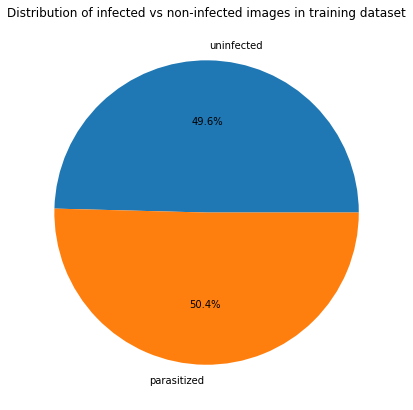

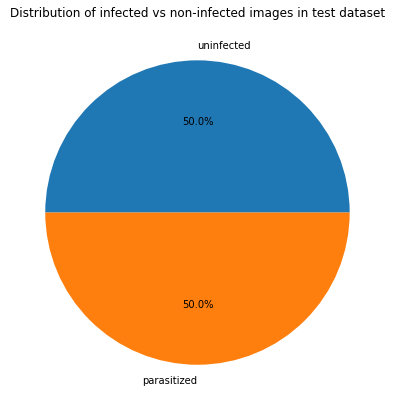

In [13]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
fig_train= plt.figure(figsize=(10,7))
plt.pie(count_train_labels, labels=(['uninfected','parasitized']), autopct='%1.1f%%')
plt.title("Distribution of infected vs non-infected images in training dataset")
plt.show()

fig_test = plt.figure(figsize=(10,7))
plt.pie(count_test_labels, labels=(['uninfected','parasitized']), autopct='%1.1f%%')
plt.title("Distribution of infected vs non-infected images in test dataset")
plt.show()

#####<b> Observations and insights: _____

As observed above: both distributions are nearly 50-50 meaning there is not sampling bias in either the training or the test data selection

### <b>Data Exploration</b>
Let's visualize the images from the train data

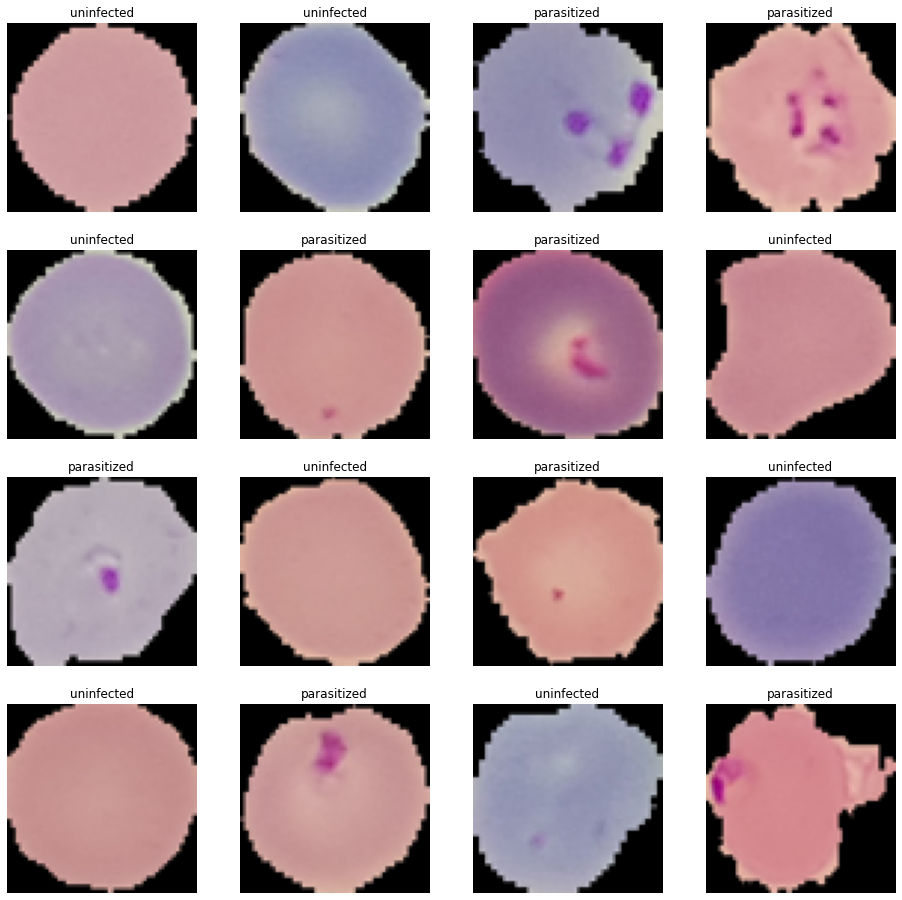

In [14]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights:

The parasitized cells often contain a dark spot in the cell. Also they tend to be a bit more red-ish than the uninfected cells.

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

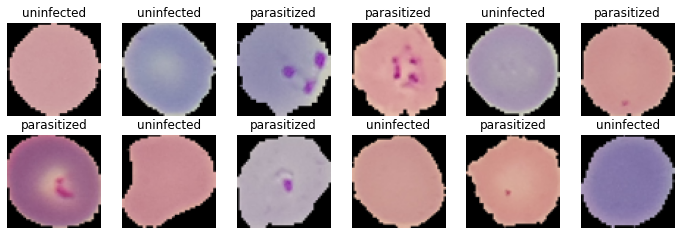

In [15]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 13):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')


#####<b>Observations and insights:
We see the same trends - parasitized cells appear more red/pink-ish and frequently have a dark spot.

The size of the image has not disrupted the trend.

###<b> Plotting the mean images for parasitized and uninfected

In [16]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

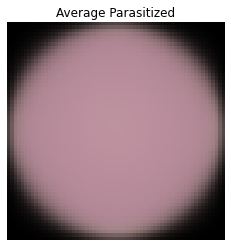

In [17]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

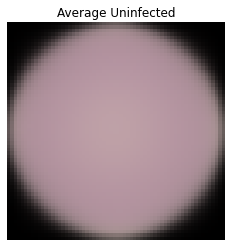

In [18]:
# Similarly write the code to find the mean image of uninfected
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
uninfected_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean



#####<b> Observations and insights: 

When we compare the average infected cell to the average uninfected cell, they look similar except for the more red/pink-ish hue on the infected cell.

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [19]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


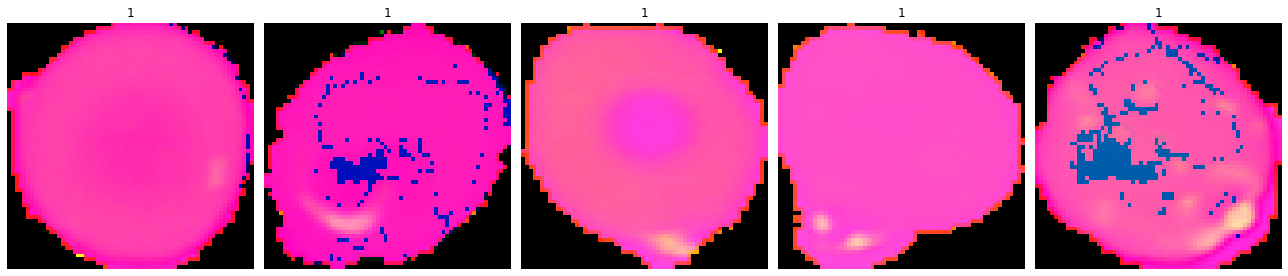

In [20]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


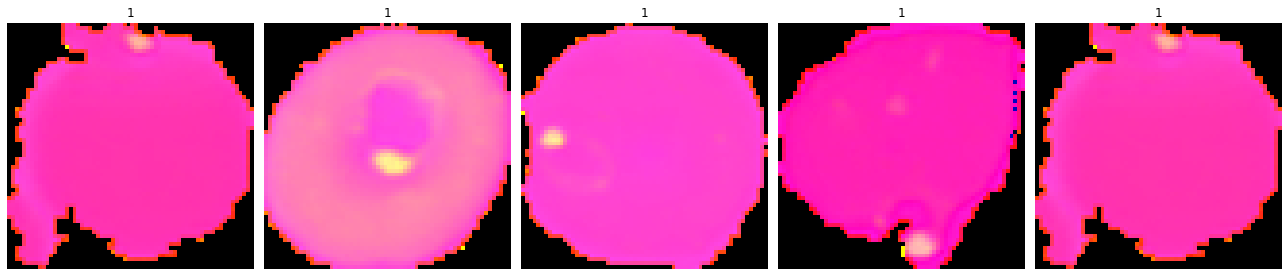

In [21]:
# Similarly you can visualize for the images in the test data
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: 
In both of these sets we happen to only get infected cells. We see the dark spot is clearly visible now as a distinctly different color and all the cells appear bright pink

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [22]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

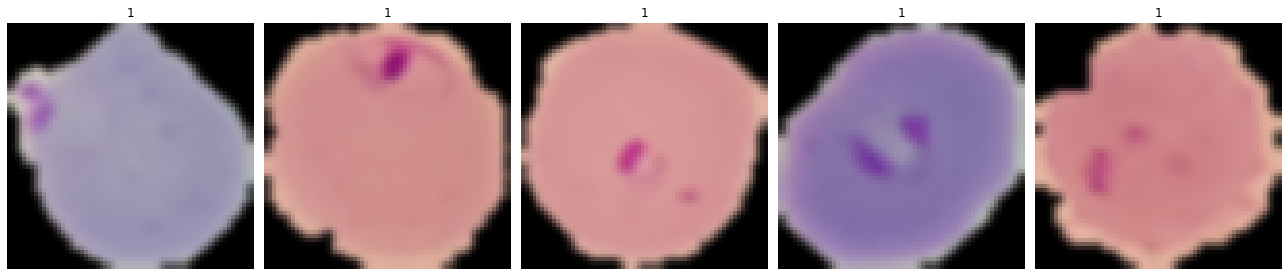

In [23]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

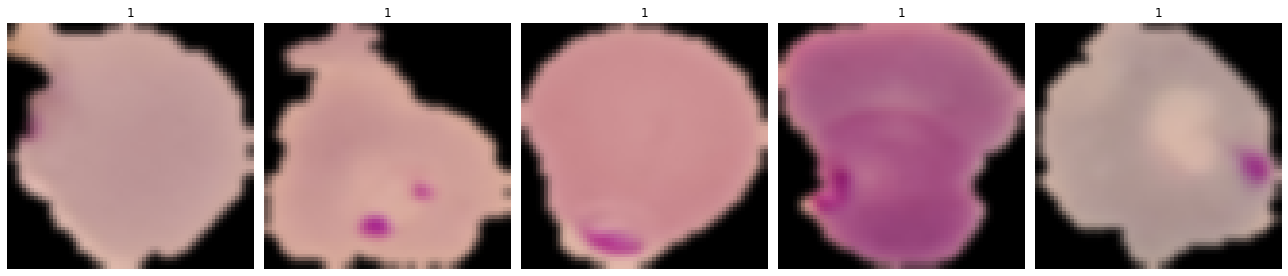

In [24]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: _____**
Bluring here helps us to observe general differences and determine the granularity needed for feature detection. We can still clearly see a dark spot in most infected cells.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
We should explore the following techniques:


*   Convolutional Neural Networks (different CNN techniques included, ex: convolution2D, MaxPool2D, batchnormalization, dropout, etc.)
*   Transfer learning



**Overall solution design:** What is the potential solution design?<br>
While transfer learning is certainly an option here, I will focus on CNN techniques and I am not immediately aware of other models that may have success for this problem.



**Measures of success:** What are the key measures of success to compare different techniques?<br>

When looking for measures of success, we should judge the success of our model on both the F1 score, and the recall. While precision is a nice-to-have, thinking from a disease prevention stand-point, false negatives are far more costly than false positives. We would rather predict someone has malaria when they do not, than fail to diagnose someone with malaria when they are infected. We know that when caught earlier, malaria is far easier to treat. Beyond that, anti-malarial drugs are easy to store, readily available in most places, and inexpensive. Therefore, it would be a more efficient use of resources to provide anti-malarial drugs to patients who might have malaria, instead of not providing them to patients that might have malaria. Therefore, recall is more important than precision. 

#<b>Milestone 2

###<B>One Hot Encoding on the train and test labels

In [25]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [26]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [27]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [29]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [30]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 7s 7ms/step - loss: 0.4200 - accuracy: 0.7941 - val_loss: 0.1623 - val_accuracy: 0.9679
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1292 - accuracy: 0.9545 - val_loss: 0.1052 - val_accuracy: 0.9870
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0989 - accuracy: 0.9678 - val_loss: 0.1185 - val_accuracy: 0.9818
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0809 - accuracy: 0.9736 - val_loss: 0.0738 - val_accuracy: 0.9834
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0742 - accuracy: 0.9749 - val_loss: 0.0764 - val_accuracy: 0.9834
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0719 - accuracy: 0.9762 - val_loss: 0.0726 - val_accuracy: 0.9844
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0667 - accuracy: 0.9766 - val_loss: 0.0710 - val_accuracy: 0.9824
Epoch 

####<b> Evaluating the model on test data

In [31]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9762

 Test_Accuracy:- 0.9761538505554199


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



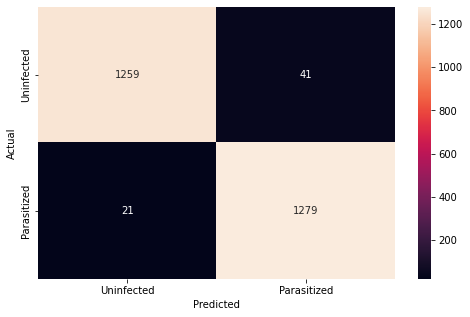

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [33]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

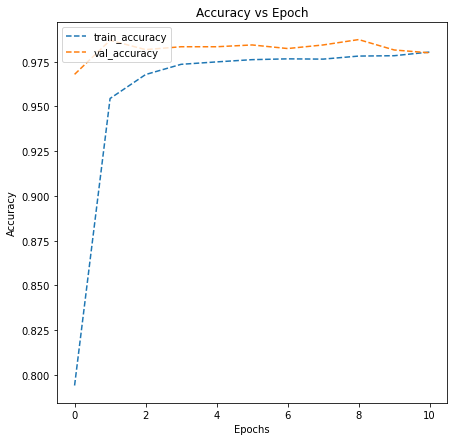

In [34]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [35]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [36]:
#creating sequential model
model1=Sequential()

# Build the model here

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax")) 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [37]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks

In [38]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [39]:
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.3311 - accuracy: 0.8380 - val_loss: 0.0752 - val_accuracy: 0.9866
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0934 - accuracy: 0.9684 - val_loss: 0.0616 - val_accuracy: 0.9858
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0850 - accuracy: 0.9721 - val_loss: 0.1035 - val_accuracy: 0.9663
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0758 - accuracy: 0.9747 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0728 - accuracy: 0.9738 - val_loss: 0.0598 - val_accuracy: 0.9812
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0728 - accuracy: 0.9758 - val_loss: 0.0613 - val_accuracy: 0.9814
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0693 - accuracy: 0.9759 - val_loss: 0.0505 - val_accuracy: 0.9828
Epoch 

####<b> Evaluating the model

In [40]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9812

 Test_Accuracy:- 0.9811538457870483


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



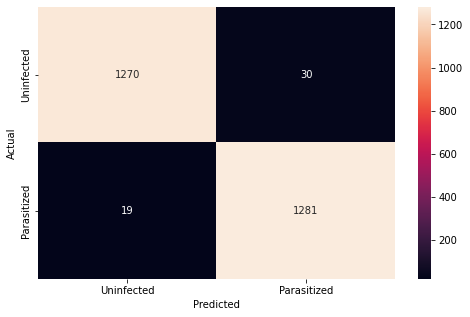

In [41]:
pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

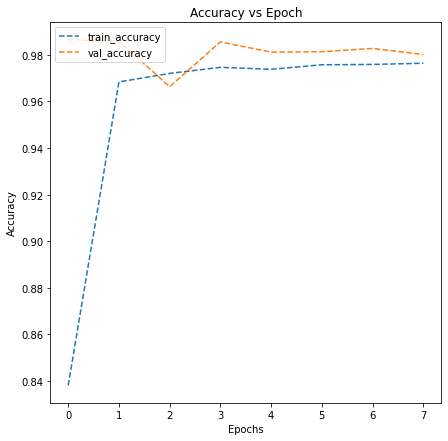

In [42]:
plot_accuracy(history1)

####<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [43]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [44]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3,3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3,3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.4))
model2.add(Dense(2,activation="softmax")) 


adam = optimizers.Adam(learning_rate=0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9

####<b>Compiling the model

In [45]:
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> Using callbacks

In [46]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [47]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.2954 - accuracy: 0.8774 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1006 - accuracy: 0.9681 - val_loss: 0.0240 - val_accuracy: 0.9942
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0877 - accuracy: 0.9724 - val_loss: 0.0512 - val_accuracy: 0.9922
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0809 - accuracy: 0.9739 - val_loss: 0.0161 - val_accuracy: 0.9964
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0714 - val_accuracy: 0.9858


<b>Plotting the train and validation accuracy

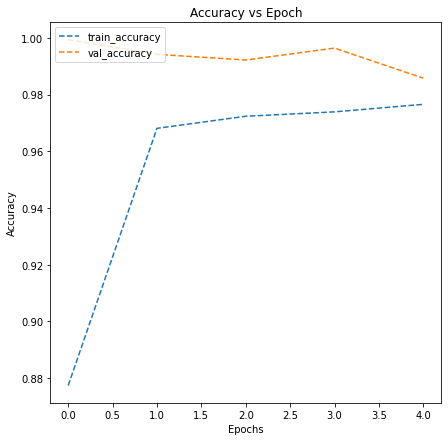

In [48]:
# plotting the accuracies
plot_accuracy(history2)


####<b>Evaluating the model

In [49]:
# Evaluate the model to calculate the accuracy
accuracy2 = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0949 - accuracy: 0.9738

 Test_Accuracy:- 0.9738461375236511


#####<b>Observations and insights: ____

Again we can observe that the training and valiation accuracy are increasing with Epochs, and that the validation accuracy is higher than the training accuracy

This model also has better accuracy than the previous 2 models created.

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



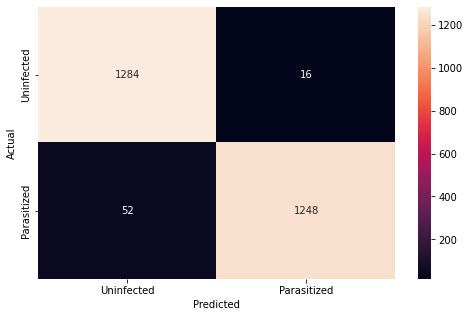

In [50]:

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [51]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 1.2, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= X_val, y = y_val, batch_size=64, seed=42, shuffle=True)

####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

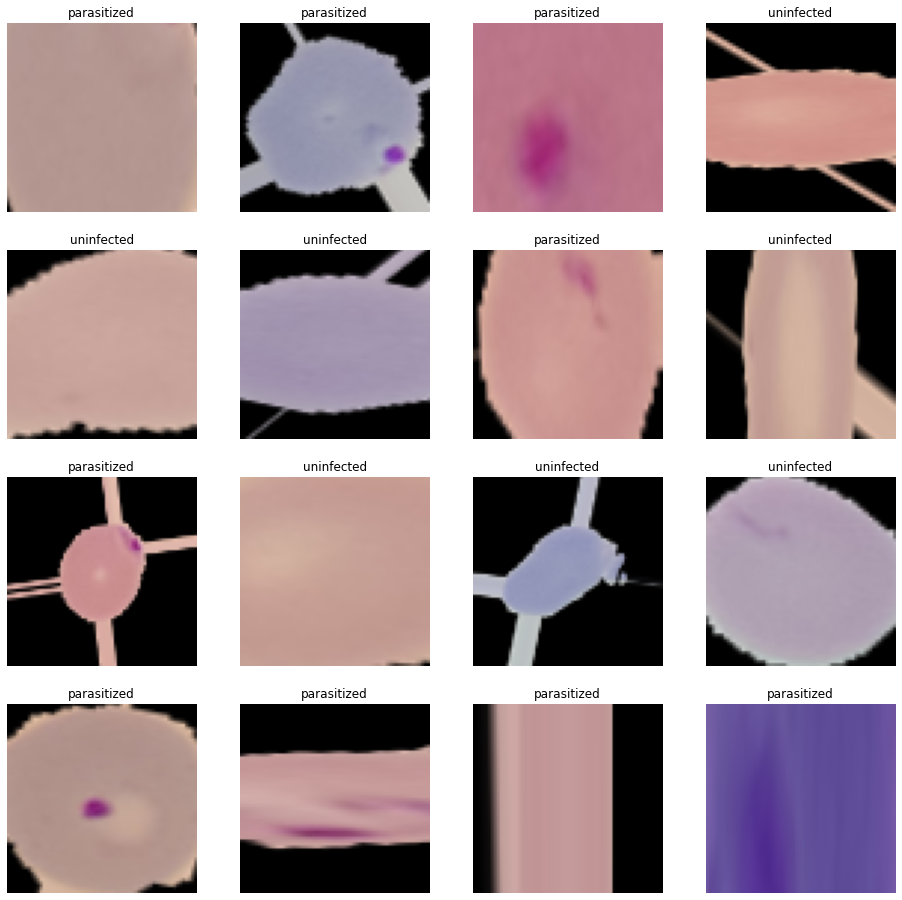

In [53]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#####<b>Observations and insights: ____

The images appear enlarged and rotated - this should help us with detection of relevant features as the middle of the cell appears to be most relevant

####<b>Building the Model

In [54]:
model3 = Sequential()

model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512,activation="relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2,activation="softmax")) 


# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model3.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [55]:
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [56]:
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=64,callbacks=callbacks,
                                  epochs=20,verbose=1)

Epoch 1/20
312/312 [==============================] - 21s 65ms/step - loss: 0.6480 - accuracy: 0.6166 - val_loss: 0.3390 - val_accuracy: 0.8852
Epoch 2/20
312/312 [==============================] - 20s 64ms/step - loss: 0.3918 - accuracy: 0.8184 - val_loss: 0.1260 - val_accuracy: 0.9685
Epoch 3/20
312/312 [==============================] - 20s 64ms/step - loss: 0.3455 - accuracy: 0.8389 - val_loss: 0.1121 - val_accuracy: 0.9732
Epoch 4/20
312/312 [==============================] - 20s 64ms/step - loss: 0.3204 - accuracy: 0.8508 - val_loss: 0.0857 - val_accuracy: 0.9742
Epoch 5/20
312/312 [==============================] - 20s 64ms/step - loss: 0.3216 - accuracy: 0.8509 - val_loss: 0.0994 - val_accuracy: 0.9718
Epoch 6/20
312/312 [==============================] - 20s 63ms/step - loss: 0.3171 - accuracy: 0.8536 - val_loss: 0.0738 - val_accuracy: 0.9798
Epoch 7/20
312/312 [==============================] - 20s 64ms/step - loss: 0.3184 - accuracy: 0.8526 - val_loss: 0.0759 - val_accuracy:

####<B>Evaluating the model

<b>Plot the train and validation accuracy

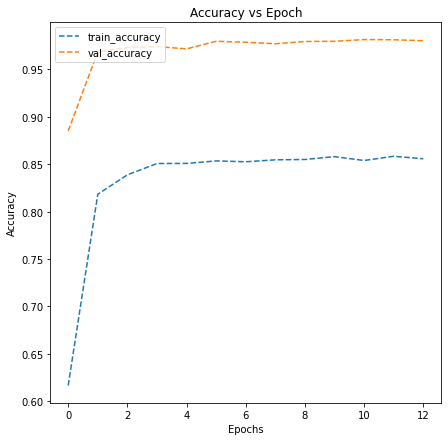

In [57]:
# plotting the accuracies
plot_accuracy(history3)

In [58]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])


82/82 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9769

 Test_Accuracy:- 0.9769230484962463


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



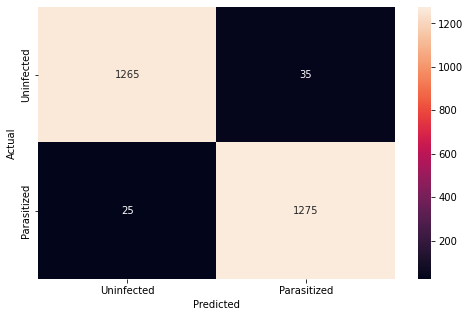

In [59]:
pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [60]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [61]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [62]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
# Add a dense layer with 64 neurons
x = Dense(64, activation='relu')(x)

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [63]:
# Compiling the model 
model4.compile(loss = 'binary_crossentropy',
                
              optimizer=adam,

              metrics = ['accuracy'])

<b> using callbacks

In [64]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [67]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs=10,
            batch_size=16,
            validation_split=0.2, 
            verbose=1)

Epoch 1/10
1248/1248 [==============================] - 17s 14ms/step - loss: 0.1341 - accuracy: 0.9514 - val_loss: 0.1142 - val_accuracy: 0.9611
Epoch 2/10
1248/1248 [==============================] - 17s 14ms/step - loss: 0.1270 - accuracy: 0.9535 - val_loss: 0.1992 - val_accuracy: 0.9267
Epoch 3/10
1248/1248 [==============================] - 17s 14ms/step - loss: 0.1280 - accuracy: 0.9536 - val_loss: 0.1601 - val_accuracy: 0.9513
Epoch 4/10
1248/1248 [==============================] - 18s 14ms/step - loss: 0.1294 - accuracy: 0.9556 - val_loss: 0.2506 - val_accuracy: 0.9083
Epoch 5/10
1248/1248 [==============================] - 18s 14ms/step - loss: 0.1253 - accuracy: 0.9553 - val_loss: 0.0725 - val_accuracy: 0.9802
Epoch 6/10
1248/1248 [==============================] - 18s 14ms/step - loss: 0.1245 - accuracy: 0.9574 - val_loss: 0.0863 - val_accuracy: 0.9710
Epoch 7/10
1248/1248 [==============================] - 18s 14ms/step - loss: 0.1210 - accuracy: 0.9573 - val_loss: 0.1437 -

<b>Plot the train and validation accuracy

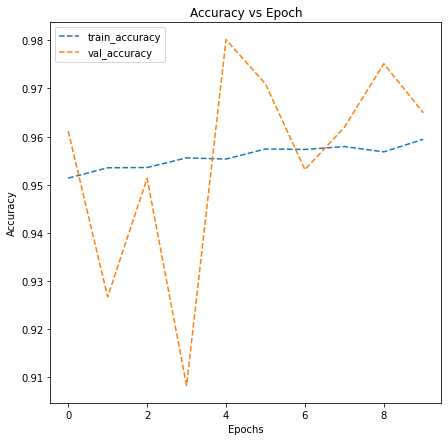

In [68]:
# plotting the accuracies
plot_accuracy(history4)

#####**Observations and insights: _____**

*   What can be observed from the validation and train curves?

####<b> Evaluating the model

In [69]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 2s 21ms/step - loss: 0.1406 - accuracy: 0.9488

 Test_Accuracy:- 0.948846161365509


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



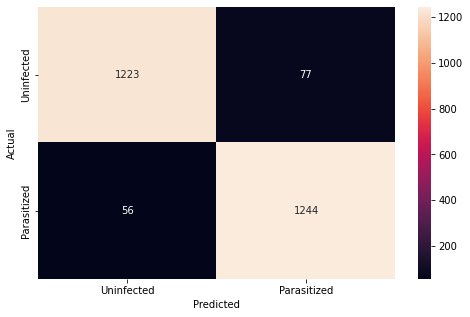

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix and generate a classification report for the model
pred = model4.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choosw the model with the best accuracy scores from all the above models and save it as a final model.


###<b> Observations and Conclusions drawn from the final model: _____

The best scenario we were able to create was our 3rd model using augmented images.

Unfortunately, I would like to get the recall a little higher. We identified false negatives as a more harmful outcome than false positives, but have fewer false positives than false negatives.

**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

We were able to get very high accuracy in our final model (98%). Our first models did well too (97%), but a 1% increase has the potential to save a lot of lives when the disease affects such a large population.

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

There is certainly still some room to improve as I can try to reduce the number of false negatives. 

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

I propose we adopt a sequential model using LekyReLU activation, batchnormalization, convolutional2D, maxpooling, and dropout layers against augmented images. This gave us our highest accuracy. 

# **Final Model Build**

Now we will take the model that performed the best and make a few last adjustments to see if we can improve performance even further. I decided to iterate on model 1 - the simple model with additional layers as this model had the fewest false negatives. As discussed in the problem statement, false negatives are far more costly than false postivies and thus minimizing false negatives should be our primary goal. All models except the enhanced images have similar validation accuracy (~97%), therefore, we can infer that model 1 does not sacrafice accuracy for the sake of minizming false negatives.

In [92]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [93]:
#creating sequential model
modelfinal=Sequential()

# Build the model here

modelfinal.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
modelfinal.add(MaxPooling2D(pool_size=2))
modelfinal.add(Dropout(0.2))
modelfinal.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
modelfinal.add(MaxPooling2D(pool_size=2))
modelfinal.add(Dropout(0.2))
modelfinal.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
modelfinal.add(MaxPooling2D(pool_size=2))
modelfinal.add(Dropout(0.2))
modelfinal.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
modelfinal.add(MaxPooling2D(pool_size=2))
modelfinal.add(Dropout(0.2))
modelfinal.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
modelfinal.add(MaxPooling2D(pool_size=2))
modelfinal.add(Dropout(0.2))


modelfinal.add(Flatten())

modelfinal.add(Dense(512,activation="relu"))
modelfinal.add(Dropout(0.3))
modelfinal.add(Dense(256,activation="relu"))
modelfinal.add(Dropout(0.3))
modelfinal.add(Dense(2,activation="sigmoid")) 
modelfinal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [94]:
modelfinal.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
callbacksfinal = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [96]:
historyfinal=modelfinal.fit(train_images,train_labels,batch_size=16,callbacks=callbacksfinal,validation_split=0.25,epochs=20,verbose=1)

Epoch 1/20
1170/1170 [==============================] - 9s 7ms/step - loss: 0.1985 - accuracy: 0.9114 - val_loss: 0.0647 - val_accuracy: 0.9821
Epoch 2/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0884 - accuracy: 0.9717 - val_loss: 0.0897 - val_accuracy: 0.9705
Epoch 3/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0842 - accuracy: 0.9733 - val_loss: 0.0518 - val_accuracy: 0.9829
Epoch 4/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0758 - accuracy: 0.9745 - val_loss: 0.0874 - val_accuracy: 0.9657
Epoch 5/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0768 - accuracy: 0.9742 - val_loss: 0.0952 - val_accuracy: 0.9673
Epoch 6/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0719 - accuracy: 0.9775 - val_loss: 0.0928 - val_accuracy: 0.9704
Epoch 7/20
1170/1170 [==============================] - 8s 7ms/step - loss: 0.0739 - accuracy: 0.9748 - val_loss: 0.0863 - val_accuracy:

In [97]:
accuracyfinal = modelfinal.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracyfinal[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0581 - accuracy: 0.9869

 Test_Accuracy:- 0.986923098564148


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1300
           1       0.98      1.00      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



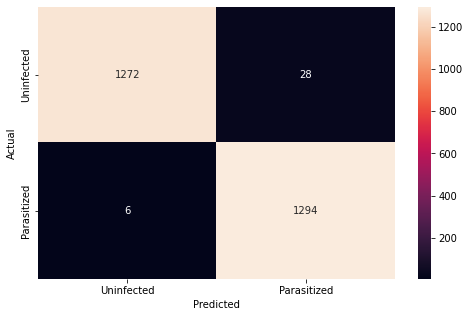

In [98]:
pred = modelfinal.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

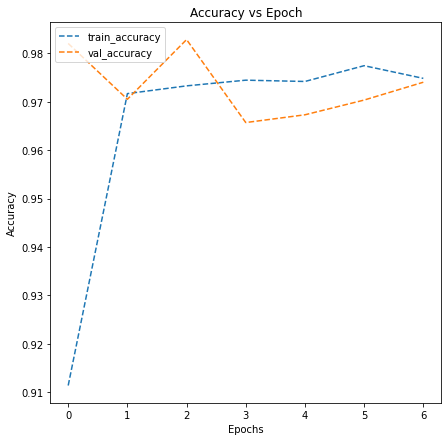

In [99]:
plot_accuracy(historyfinal)